In [1]:
import pandas as pd
import numpy as np
import pickle as pk
import re, string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ITC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
605,sport,parry firm over gerrard listen to the full int...
1317,politics,labour s four little words labour has unveiled...
434,business,s korean lender faces liquidation creditors of...
390,entertainment,joy division story to become film the life of ...
1560,business,china had role in yukos split-up china lent ru...
...,...,...
824,politics,prime minister s questions so who if anyone ...
978,politics,february poll claim speculation reports that...
1069,business,dollar drops on reserves concerns the us dolla...
288,politics,brown targets oaps and homebuyers gordon brown...


In [3]:
df['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

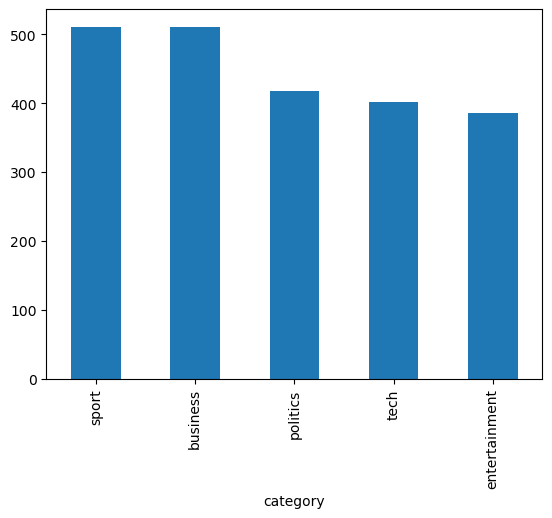

In [4]:
df['category'].value_counts().plot.bar()
plt.show()

In [5]:
#Data Preprocessing

In [10]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [11]:
re.sub("[^a-zA-Z]", " ", df['text'][0].lower())

'tv future in the hands of viewers with home theatre systems  plasma high definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time   that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes  with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices   one of the most talked about technologies of ces has been digital and personal video recorders  dvr and pvr   these set top boxes  like the us s tivo and the uk s sky  system  allow people to record  store  play  pause and forward wind tv programmes when they want   essentially  the technology allows for much more personalised tv  they are also being built in to high

In [12]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ITC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing I love computers".split()
data = " ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
data

'i am love comput i love comput'

In [14]:
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")

'i am love comput'

In [15]:
# Data Cleaning removing stopwords

In [16]:
" ".join([stemmer.stem(i) for i in df['text'][0].split()]) # stremmer lagako


'tv futur in the hand of viewer with home theatr system plasma high-definit tv and digit video record move into the live room the way peopl watch tv will be radic differ in five year time. that is accord to an expert panel which gather at the annual consum electron show in la vega to discuss how these new technolog will impact one of our favourit pastimes. with the us lead the trend programm and other content will be deliv to viewer via home network through cabl satellit telecom compani and broadband servic provid to front room and portabl devices. one of the most talked-about technolog of ce ha been digit and person video record (dvr and pvr). these set-top box like the us s tivo and the uk s sky+ system allow peopl to record store play paus and forward wind tv programm when they want. essenti the technolog allow for much more personalis tv. they are also be built-in to high-definit tv set which are big busi in japan and the us but slower to take off in europ becaus of the lack of hig

In [17]:
" ".join([i for i in df['text'][0].split() if i not in words])# stremmer lagayera pani ajhai stopword hataiyo

'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming. people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms a

In [18]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['text']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

TypeError: sequence item 0: expected str instance, list found

In [ ]:
df.to_csv('cleaned_bbc_data.csv')

In [33]:
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
df

,category,text,cleaned
120,entertainment,slater star broadway play actor christian slat...,slater star broadway play actor christian slat...
1725,business,gaming firm sell uk dog tracks six uk greyhoun...,game firm sell uk dog track six uk greyhound t...
1469,sport,legendary dutch boss michels dies legendary du...,legendari dutch boss michel die legendari dutc...
437,politics,whitehall shredding increasing - tories civil ...,whitehal shred increas tori civil servant dras...
444,business,peugeot deal boosts mitsubishi struggling japa...,peugeot deal boost mitsubishi struggl japanes ...
...,...,...,...
366,tech,mobile multimedia slow catch doubt mobile phon...,mobil multimedia slow catch doubt mobil phone ...
140,business,disaster claims less $10bn insurers sought cal...,disast claim less bn insur sought calm fear fa...
1048,entertainment,de niro film leads us box office film star rob...,de niro film lead us box offic film star rober...
1384,business,air passengers win new eu rights air passenger...,air passeng win new eu right air passeng unabl...


In [35]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['text']# cleaned rakheni hunxa
Y = df['category'].astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=5000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
import pickle
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [36]:
X_test

1646    van nistelrooy set return manchester united st...
640     conservative backing id cards tories back cont...
2114    academy awards flourished 77th annual academy ...
1038    apple makes blogs reveal sources apple legal f...
975     zambia confident cautious zambia technical dir...
                              ...                        
1695    new yob targets unveiled fifty new areas getti...
1170    brizzel run aaa sheffield ballymena sprinter p...
215     navratilova hits critics martina navratilova d...
446     broadband challenges tv viewing number europea...
788     virus poses christmas e-mail security firms wa...
Name: text, Length: 334, dtype: object

In [37]:
y_test

1646            sport
640          politics
2114    entertainment
1038             tech
975             sport
            ...      
1695         politics
1170            sport
215             sport
446              tech
788              tech
Name: category, Length: 334, dtype: object

In [38]:
#Test Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9670658682634731


In [39]:
#Train Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_train)
# print(predict_news_cat)
print(accuracy_score(y_train,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9936541512427287


In [40]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

news_data_df['predict_news'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), news_data_df['predict_news']))
news_data_df['predict_news'] = news_data_df['predict_news'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])  # input dida actual news diney kunai site bata

Enter news =  mahesh will be a genius mind in near future


Predicted news category =  sport


In [41]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))

               precision    recall  f1-score   support

     business       0.93      0.96      0.94        68
entertainment       0.98      0.96      0.97        55
     politics       0.97      0.94      0.96        70
        sport       0.99      0.99      0.99        88
         tech       0.96      0.98      0.97        53

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334

[[65  1  1  0  1]
 [ 0 53  1  0  1]
 [ 4  0 66  0  0]
 [ 1  0  0 87  0]
 [ 0  0  0  1 52]]


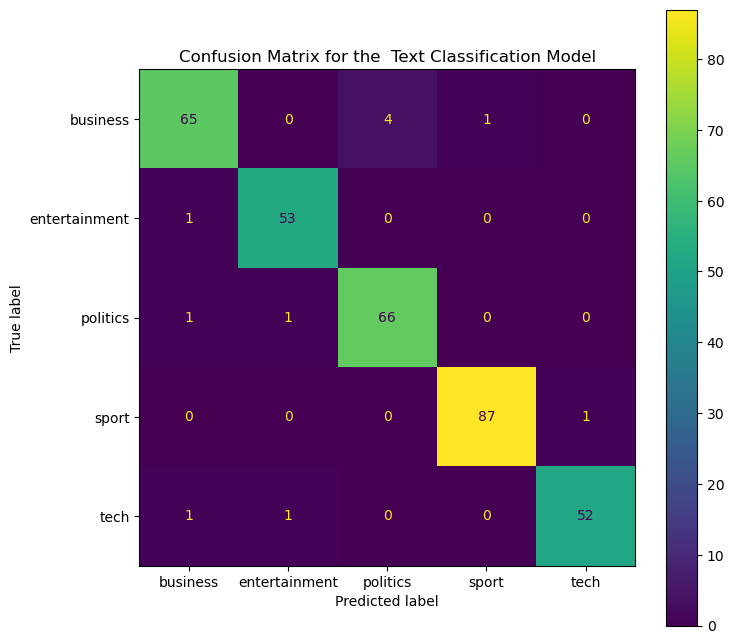

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [43]:
vectorizer.vocabulary_

{'beckham': 3419,
 'virus': 26423,
 'spotted': 23331,
 'net': 17047,
 'writers': 27250,
 'trading': 25214,
 'interest': 13353,
 'david': 7159,
 'distribute': 8101,
 'malicious': 15472,
 'wares': 26633,
 'messages': 16104,
 'circulating': 5498,
 'widely': 26932,
 'purport': 19742,
 'evidence': 9398,
 'england': 9063,
 'captain': 4845,
 'compromising': 6073,
 'position': 19073,
 'anyone': 2398,
 'visiting': 26437,
 'website': 26760,
 'mentioned': 16050,
 'message': 16100,
 'see': 22030,
 'pictures': 18689,
 'mr': 16694,
 'computer': 6081,
 'infected': 13084,
 'pernicious': 18499,
 'program': 19475,
 'opens': 17641,
 'backdoor': 3048,
 'controlled': 6433,
 'remotely': 20624,
 'hackers': 11653,
 'appearance': 2440,
 'windows': 27005,
 'trojan': 25410,
 'another': 2355,
 'example': 9428,
 'long': 15133,
 'line': 14958,
 'viruses': 26424,
 'trade': 25206,
 'celebrities': 5087,
 'attempt': 2829,
 'fuel': 10706,
 'spread': 23337,
 'tennis': 24650,
 'player': 18844,
 'anna': 2316,
 'kournikova'